#**Fully connected neural networks applied in MNIST digit recognition manuscripts**

In [35]:
import keras

#Load MNIST dataset
mnist = keras.datasets.mnist

#Load training and testing split from MNIST dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

label: 0
Image: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 2

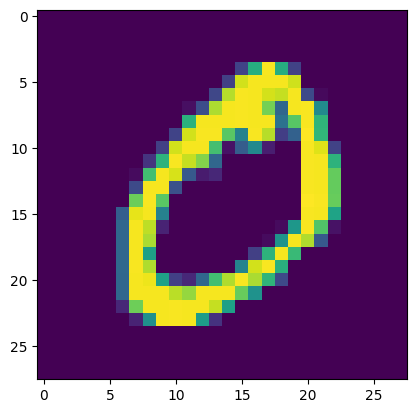

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Between or and 59999
index = 1

#Print the label and image.
np.set_printoptions(linewidth = 320)
print(f'label: {training_labels[index]}')
print(f'Image: \n{training_images[index]}')

#View the image
plt.imshow(training_images[index])

In [38]:
#Normalize train pixel values and test images
training_images = training_images/255.0
test_images = test_images/255.0

In [39]:
#Build the classification model
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [40]:
#Compile the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
#Train the model
history = model.fit(training_images, training_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1122 - accuracy: 0.7377
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4595 - accuracy: 0.8800
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3671 - accuracy: 0.8986
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3307 - accuracy: 0.9060
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3101 - accuracy: 0.9113
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2950 - accuracy: 0.9150
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2832 - accuracy: 0.9183
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2725 - accuracy: 0.9214
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2628 - accuracy: 0.9244
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.253

<Axes: >

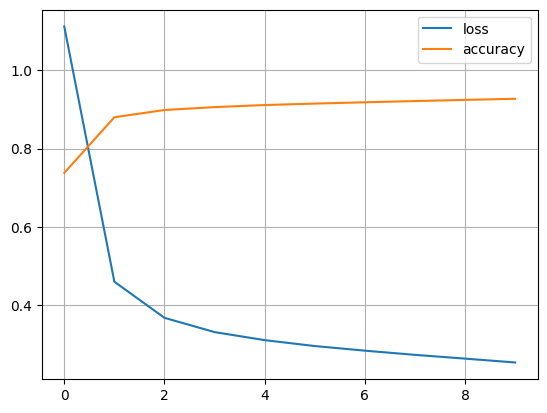

In [42]:
#Graph training history:
pd.DataFrame(history.history).plot(grid=True)

In [43]:
#Evaluate the model on the training set
loss, accuracy = model.evaluate(training_images, training_labels)
print(f'Pérdida en el conjunto de entrenamiento: {loss}')
print(f'Precisión en el conjunto de entrenamiento {accuracy}')


#Evaluate the model with unseen data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Pérdida en el conjunto de entrenamiento: {loss}')
print(f'Precisión en el conjunto de entrenamiento {accuracy}')


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.9286
Pérdida en el conjunto de entrenamiento: 0.24725769460201263
Precisión en el conjunto de entrenamiento 0.9286333322525024
313/313 [==============================] - 1s 2ms/step - loss: 0.2484 - accuracy: 0.9294
Pérdida en el conjunto de entrenamiento: 0.24835282564163208
Precisión en el conjunto de entrenamiento 0.9294000267982483
